https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

In [1]:
import pandas as pd
# Importing the house price dataset
df=pd.read_csv(r'C:\Users\Admin\OneDrive - National University of Sciences & Technology\Desktop\Python-Lectures\housepricedata.csv')
df.head() 

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [2]:
dataset = df.values### Converting data set into arrays
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [3]:
X = dataset[:,0:10] ##First 10 variables as the input vectors
X
Y = dataset[:,10]## output vector Price of house

X,Y

(array([[ 8450,     7,     5, ...,     8,     0,   548],
        [ 9600,     6,     8, ...,     6,     1,   460],
        [11250,     7,     5, ...,     6,     1,   608],
        ...,
        [ 9042,     7,     9, ...,     9,     2,   252],
        [ 9717,     5,     6, ...,     5,     0,   240],
        [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64),
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64))

In [4]:
from sklearn import preprocessing ## Import sklearn for data pre-processing

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)###scales the dataset so that all the input features lie between 0 and 1 inclusive:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [7]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [8]:
## Finding dimension of sub-vectors and matric
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [9]:
from keras.models import Sequential ## Import Sequential from Keras.model library to run ANN model
from keras.layers import Dense ###Import Dense from Keras.layers  library
##Learn more about Dense from this link 
###https://www.tutorialspoint.com/keras/keras_dense_layer.htm#:~:text=Dense%20layer%20is%20the%20regular,input%2C%20kernel)%20%2B%20bias)

In [11]:
##Constructing a sequential ANN model(specify that in our Keras sequential model like this:)
model = Sequential([
    Dense(16, activation='relu', input_shape=(10,)),  ###Hidden layer 1: 32 neurons, ReLU activation.
    Dense(16, activation='relu'), ##Hidden layer 2: 32 neurons, ReLU activation
    Dense(1, activation='sigmoid'),##Output Layer: 1 neuron, Sigmoid activation
])

In [12]:
## Adding Dense 
Dense(16, activation='relu', input_shape=(10,)),
Dense(16, activation='relu'),
Dense(1, activation='sigmoid'),

(<keras.layers.core.dense.Dense at 0x1bdb53475e0>,)

In [14]:
##Compile the model (Filling in the best numbers)
model.compile(optimizer='sgd',  ##stochastic gradient descent (over here, it refers to mini-batch gradient descent)
              loss='binary_crossentropy', ##The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
              metrics=['accuracy'])## track accuracy on top of the loss function

In [15]:
optimizer='sgd'

In [16]:
loss='binary_crossentropy'

In [24]:
acc=['accuracy']

In [25]:
##This function will output a history, which we save under the variable hist. 
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,  ##the size of our mini-batch   ## epochs: how long we want to train it for 
          validation_data=(X_val, Y_val))
##specify what our validation data is so that the model will tell us how we are doing on the validation data at each point

Epoch 1/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2994 - accuracy: 0.8757 - val_loss: 0.3127 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2983 - accuracy: 0.8787 - val_loss: 0.3157 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2981 - accuracy: 0.8816 - val_loss: 0.3108 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2975 - accuracy: 0.8777 - val_loss: 0.3093 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2964 - accuracy: 0.8757 - val_loss: 0.3074 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2960 - accuracy: 0.8777 - val_loss: 0.3068 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2954 - accuracy: 0.8767 - val_loss: 0.3050 - val_accuracy: 0.8767
Epoch 8/100


In [19]:
## the accuracy on our test set
model.evaluate(X_test, Y_test)[1] 

7/7 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.8813


0.8812785148620605

In [21]:
import matplotlib.pyplot as plt

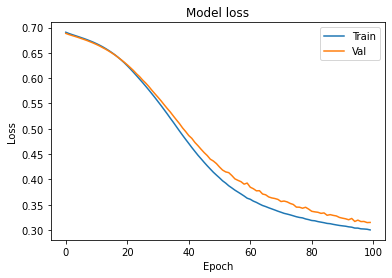

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

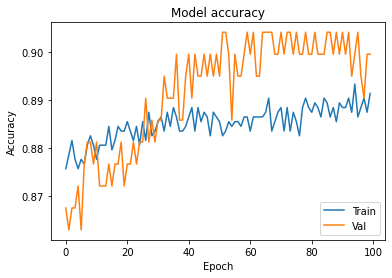

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
##Over fitted ANN Model with complex Architechture
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 52ms/step - loss: 0.4680 - accuracy: 0.7935 - val_loss: 0.4591 - val_accuracy: 0.7808
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3470 - accuracy: 0.8523 - val_loss: 0.3667 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3486 - accuracy: 0.8542 - val_loss: 0.4654 - val_accuracy: 0.7717
Epoch 4/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3009 - accuracy: 0.8757 - val_loss: 0.2961 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2733 - accuracy: 0.8855 - val_loss: 0.3205 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2689 - accuracy: 0.8973 - val_loss: 0.2684 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2486 - accuracy: 0.8973 - val_loss: 0.3271 - val_accuracy: 0.8493
Epoch 

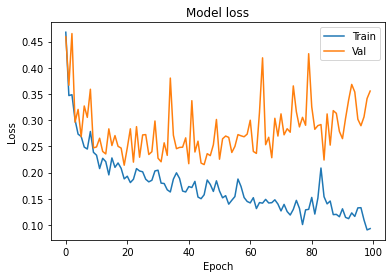

In [31]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

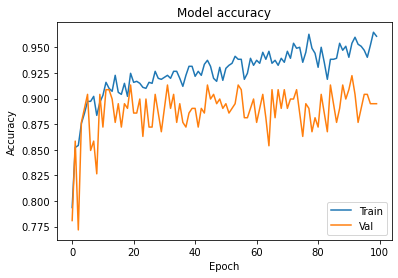

In [32]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()